## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np

# DF's

In [2]:
disney = pd.read_csv("Disney_Stocks_NASDAQ.csv",delimiter=',')
disney[disney.columns[1:]] = disney[disney.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
disney

,Date,Close/Last,Volume,Open,High,Low
0,4/5/2024,118.38,9653915.0,116.60,118.86,116.30
1,4/4/2024,117.09,13815400.0,119.22,120.19,116.96
2,4/3/2024,118.98,22480440.0,122.27,123.69,118.38
3,4/2/2024,122.82,15517070.0,120.22,123.53,120.16
4,4/1/2024,121.53,8419727.0,122.06,122.40,120.78
...,...,...,...,...,...,...
2512,4/11/2014,77.01,9204142.0,77.51,77.95,76.81
2513,4/10/2014,77.51,10149530.0,80.92,80.92,77.48
2514,4/9/2014,80.47,7004815.0,79.97,80.53,79.26
2515,4/8/2014,79.57,7085061.0,79.27,79.65,78.12


In [3]:
disney['date'] = pd.to_datetime(disney['Date']).dt.date
disney = disney.drop("Date", axis = 1)
disney

,Close/Last,Volume,Open,High,Low,date
0,118.38,9653915.0,116.60,118.86,116.30,2024-04-05
1,117.09,13815400.0,119.22,120.19,116.96,2024-04-04
2,118.98,22480440.0,122.27,123.69,118.38,2024-04-03
3,122.82,15517070.0,120.22,123.53,120.16,2024-04-02
4,121.53,8419727.0,122.06,122.40,120.78,2024-04-01
...,...,...,...,...,...,...
2512,77.01,9204142.0,77.51,77.95,76.81,2014-04-11
2513,77.51,10149530.0,80.92,80.92,77.48,2014-04-10
2514,80.47,7004815.0,79.97,80.53,79.26,2014-04-09
2515,79.57,7085061.0,79.27,79.65,78.12,2014-04-08


In [4]:
rc = pd.read_csv("comments.csv")
rc['Date'] = pd.to_datetime(rc['date']).dt.date
rc['Time'] = pd.to_datetime(rc['date']).dt.time
rc = rc.drop(["date","Time"], axis='columns')
rc

,comment_id,post_id,body,Date
0,kyvb3x0,1c08w09,Don't forget that Disney owns Hulu so boycott ...,2024-04-10
1,kv5x740,1bg9err,Given how the counter-productive actions of fa...,2024-03-16
2,kv6e8vl,1bg9err,Just like Sesame Street needed a cofunding dea...,2024-03-16
3,kv5uvdu,1bg9err,"Frankly, I have no interest in this. I'll watc...",2024-03-16
4,kv6pibp,1bg9err,Russell T Davies gave a talk somewhere a few y...,2024-03-16
...,...,...,...,...
195,khu598n,195dvjg,I remain confused about why it is so hard to i...,2024-01-14
196,khw8wqg,195dvjg,This post is from 6 years ago. A lot can chang...,2024-01-15
197,khynuoc,195dvjg,I remain confused as to how it’s hard to under...,2024-01-15
198,khwaplv,195dvjg,https://www.tehrantimes.com/news/490473/Disney...,2024-01-15


In [5]:
rp = pd.read_csv("posts.csv")
rp['Date'] = pd.to_datetime(rp['date']).dt.date
rp['Time'] = pd.to_datetime(rp['date']).dt.time
rp = rp.drop(["date","Time"], axis='columns')
rp

,post_id,title,url,selftext,Date
0,1c08w09,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-10
1,1c05vei,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-09
2,1c04h9l,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-09
3,1c00am9,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-09
4,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16
5,1b9cpvd,BOYCOTT DISNEY AND PIXAR!!!! #FuckDisney #Fuck...,https://i.redd.it/wlalipq0v0nc1.png,NaN,2024-03-08
6,1amt3o4,The Disney boycott is having an effect. Keep i...,https://i.redd.it/qbaie4yvdlhc1.jpeg,NaN,2024-02-09
7,1agbn9h,Target Liquidates Disney Products as Boycott C...,https://insidethemagic.net/2024/02/target-disn...,NaN,2024-02-01
8,1aga4io,Target Liquidates Disney Products as Boycott C...,https://insidethemagic.net/2024/02/target-disn...,NaN,2024-02-01
9,1aga45u,Target Liquidates Disney Products as Boycott C...,https://insidethemagic.net/2024/02/target-disn...,NaN,2024-02-01


In [6]:
reddit = rp.merge(rc,on = "post_id")
reddit = reddit.drop("Date_y", axis = 1)
reddit

,post_id,title,url,selftext,Date_x,comment_id,body
0,1c08w09,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-10,kyvb3x0,Don't forget that Disney owns Hulu so boycott ...
1,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16,kv5x740,Given how the counter-productive actions of fa...
2,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16,kv6e8vl,Just like Sesame Street needed a cofunding dea...
3,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16,kv5uvdu,"Frankly, I have no interest in this. I'll watc..."
4,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16,kv6pibp,Russell T Davies gave a talk somewhere a few y...
...,...,...,...,...,...,...,...
195,195dvjg,Do you boycott Disney even if it’s not what yo...,https://www.reddit.com/r/AskParents/comments/1...,I’m asking mostly because I’ve read things fro...,2024-01-13,khu598n,I remain confused about why it is so hard to i...
196,195dvjg,Do you boycott Disney even if it’s not what yo...,https://www.reddit.com/r/AskParents/comments/1...,I’m asking mostly because I’ve read things fro...,2024-01-13,khw8wqg,This post is from 6 years ago. A lot can chang...
197,195dvjg,Do you boycott Disney even if it’s not what yo...,https://www.reddit.com/r/AskParents/comments/1...,I’m asking mostly because I’ve read things fro...,2024-01-13,khynuoc,I remain confused as to how it’s hard to under...
198,195dvjg,Do you boycott Disney even if it’s not what yo...,https://www.reddit.com/r/AskParents/comments/1...,I’m asking mostly because I’ve read things fro...,2024-01-13,khwaplv,https://www.tehrantimes.com/news/490473/Disney...


## EDA 

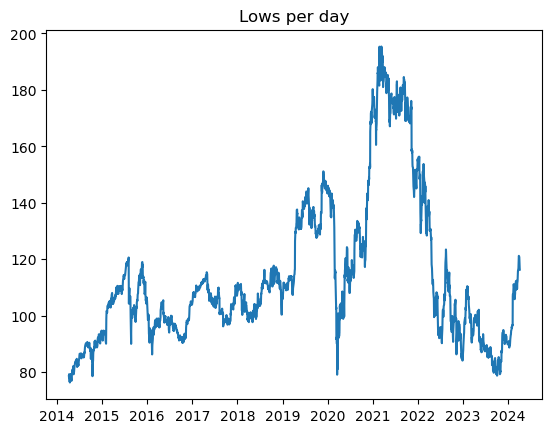

In [8]:
plt.plot("date", "Low", data = disney)
plt.title("Lows per day (DISNEY)")
plt.show()
plt.savefig('Lows per day (DISNEY)')

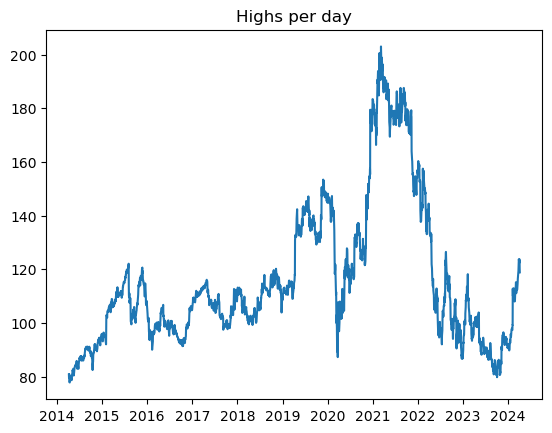

In [9]:
plt.plot("date", "High", data = disney)
plt.title("Highs per day")
plt.show()
plt.savefig('Highs per day (DISNEY)')

In [10]:
reddit.groupby("post_id").agg("count").reset_index()
reddit.to_csv('reddit.csv')

,post_id,title,url,selftext,Date_x,comment_id,body
0,195dvjg,78,78,78,78,78,78
1,19cjljo,6,6,0,6,6,6
2,1amt3o4,1,1,0,1,1,1
3,1b9cpvd,9,9,0,9,9,9
4,1bg9err,105,105,105,105,105,105
5,1c08w09,1,1,0,1,1,1


## Sentiment Analysis

In [12]:
rc_list = []
for i in range(200):
    p_1 = TextBlob(rc["body"][i]).sentiment.polarity
    rc_list.append(p_1)

In [13]:
rc_list

[0.0,
 0.1786096256684492,
 0.2357142857142857,
 0.13636363636363635,
 -0.25833333333333336,
 -0.25,
 -0.33142857142857146,
 -0.1,
 0.16095238095238093,
 0.0,
 0.18333333333333335,
 0.0,
 0.20999999999999996,
 -0.5,
 0.12666666666666665,
 0.19374999999999998,
 0.10909090909090909,
 0.07333333333333335,
 0.0,
 -0.024999999999999994,
 0.0,
 -0.5,
 0.0,
 0.04062500000000001,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03585858585858587,
 -0.007482993197278911,
 -0.0035714285714285587,
 0.0,
 0.04554924242424242,
 -0.13,
 0.02083333333333333,
 0.0,
 0.0,
 0.0,
 0.4,
 -0.6666666666666666,
 0.13636363636363635,
 0.19152462121212124,
 0.125,
 0.39375,
 0.225,
 0.016666666666666666,
 0.0,
 0.05,
 0.062121212121212126,
 0.0625,
 0.0,
 0.0,
 0.042857142857142864,
 0.0909090909090909,
 -0.13333333333333333,
 -0.41666666666666663,
 -0.25,
 0.6,
 0.0,
 0.0,
 -0.10982954545454546,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4616666666666666,
 -0.15357142857142855,
 0.285714285714285

In [14]:
rp_list = []
for i in range(12):
    p_1 = TextBlob(rp["title"][i]).sentiment.polarity
    rp_list.append(p_1)

In [15]:
rp_list

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.39999999999999997, 0.0]

In [16]:
rc_dict = {"comments":rc["comment_id"], "sentiment": rc_list, "date":rc['Date']}
df = pd.DataFrame.from_dict(rc_dict)
df['sentiment'].mean()

0.05824079880986023

In [18]:
ndf = df.merge(disney, on = "date")
ndf

,comments,sentiment,date,Close/Last,Volume,Open,High,Low
0,kvd4m1k,-0.007483,2024-03-18,113.85,11820760.0,112.29,114.43,112.29
1,kvgyszq,-0.133333,2024-03-18,113.85,11820760.0,112.29,114.43,112.29
2,kvk3xmk,-0.003571,2024-03-19,114.51,10999740.0,113.41,115.17,113.24
3,ktvd39a,0.400000,2024-03-08,110.32,10009190.0,110.18,111.31,109.34
4,ktv7bdc,-0.200000,2024-03-08,110.32,10009190.0,110.18,111.31,109.34
5,ktwfez6,0.000000,2024-03-08,110.32,10009190.0,110.18,111.31,109.34
6,kpo3phi,0.000000,2024-02-09,108.39,21509090.0,109.60,110.15,107.69
7,kiz9ka7,0.057738,2024-01-22,95.08,15119380.0,92.87,95.23,92.87
8,kiz79e4,0.000000,2024-01-22,95.08,15119380.0,92.87,95.23,92.87
9,kizh6jp,0.250000,2024-01-22,95.08,15119380.0,92.87,95.23,92.87


In [19]:
np.corrcoef(ndf["sentiment"], ndf["Close/Last"])

array([[ 1.        , -0.38190184],
       [-0.38190184,  1.        ]])

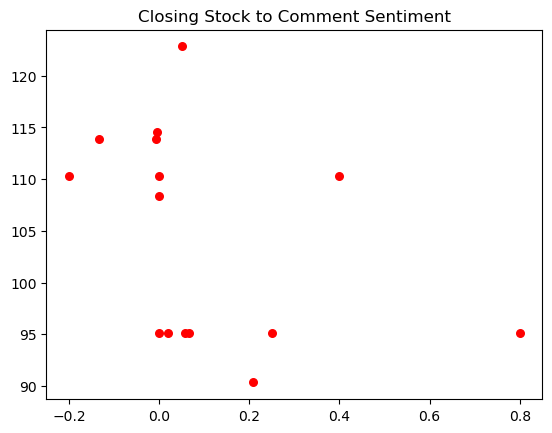

In [29]:
plt.scatter(ndf["sentiment"],ndf["Close/Last"], color = "r", marker = "o", s = 30)
plt.title("Closing Stock to Comment Sentiment")
plt.savefig('Closing Stock to Comment Sentiment')
plt.show()

In [17]:
rp_dict = {"comments":rp["post_id"], "sentiment": rp_list,"date":rp['Date']}
df1 = pd.DataFrame.from_dict(rp_dict)
df1['sentiment'].mean()

0.15833333333333333

In [21]:
ndf1 = df1.merge(disney, on = "date")
ndf

,comments,sentiment,date,Close/Last,Volume,Open,High,Low
0,kvd4m1k,-0.007483,2024-03-18,113.85,11820760.0,112.29,114.43,112.29
1,kvgyszq,-0.133333,2024-03-18,113.85,11820760.0,112.29,114.43,112.29
2,kvk3xmk,-0.003571,2024-03-19,114.51,10999740.0,113.41,115.17,113.24
3,ktvd39a,0.400000,2024-03-08,110.32,10009190.0,110.18,111.31,109.34
4,ktv7bdc,-0.200000,2024-03-08,110.32,10009190.0,110.18,111.31,109.34
5,ktwfez6,0.000000,2024-03-08,110.32,10009190.0,110.18,111.31,109.34
6,kpo3phi,0.000000,2024-02-09,108.39,21509090.0,109.60,110.15,107.69
7,kiz9ka7,0.057738,2024-01-22,95.08,15119380.0,92.87,95.23,92.87
8,kiz79e4,0.000000,2024-01-22,95.08,15119380.0,92.87,95.23,92.87
9,kizh6jp,0.250000,2024-01-22,95.08,15119380.0,92.87,95.23,92.87


In [22]:
np.corrcoef(ndf1["sentiment"], ndf1["Close/Last"])

array([[ 1.        , -0.95915213],
       [-0.95915213,  1.        ]])

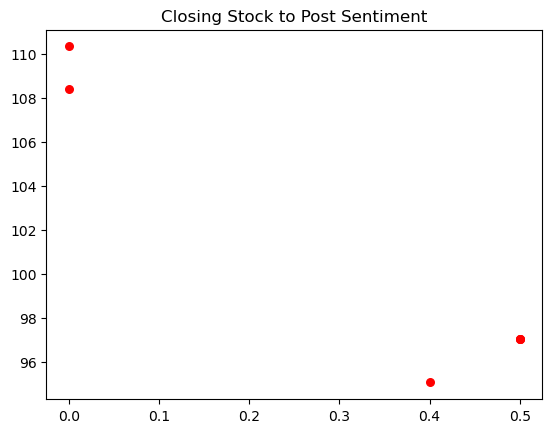

In [32]:
plt.scatter(ndf1["sentiment"],ndf1["Close/Last"], color = "r", marker = "o", s = 30)
plt.title("Closing Stock to Post Sentiment")
plt.savefig('Closing Stock to Post Sentiment')
plt.show()